In [5]:
!pip install qiskit

In [0]:
from qiskit import QuantumCircuit
from qiskit.compiler import transpile
import numpy as np
import cirq
from cirq.contrib.svg import SVGCircuit
from qiskit.quantum_info.operators import Operator

## Decomposition of N-qubit circuit using Qiskit Transpile

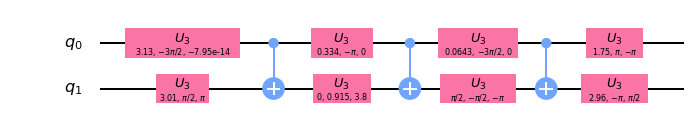

In [0]:
q=2
A=np.random.rand(2**q,2**q)
U,S,V=np.linalg.svd(A)
#print(U)
qiskit_ckt=QuantumCircuit(q)
qiskit_ckt.unitary(U,list(range(q)))
qiskit_ckt=transpile(qiskit_ckt,basis_gates=['cx','u3'])
qiskit_ckt.draw(output='mpl')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


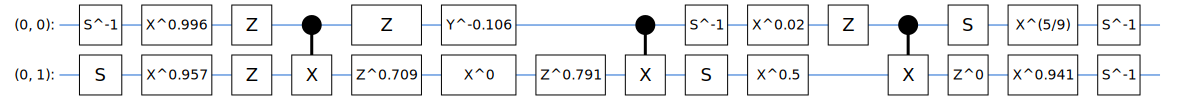

In [0]:
cirq_ckt=cirq.Circuit()
cirq_qubits=cirq.GridQubit.rect(1,q)

for data in qiskit_ckt.data:
    if data[0].name=='u3':
        theta, phi, lambd = data[0]._params
        matrix=np.array([[np.cos(theta/2),-np.exp(1j*lambd)*np.sin(theta/2)],[np.exp(1j*phi)*np.sin(theta/2),np.exp(1j*(phi+lambd))*np.cos(theta/2)]])
        #print(np.array(matrix).round(3))
        
        synthesized_operations = cirq.single_qubit_matrix_to_gates(matrix)
        for opr in synthesized_operations:
            cirq_ckt.append(opr(cirq_qubits[data[1][0].index]))
        
    elif data[0].name=='cx':
        cirq_ckt.append(cirq.CNOT(cirq_qubits[data[1][0].index],cirq_qubits[data[1][1].index]))
        
SVGCircuit(cirq_ckt)

## Decomposition of 2-qubit unitary matrix

[[ 0.047+0.297j  0.186+0.656j  0.525-0.38j  -0.023+0.154j]
 [ 0.353-0.25j   0.461+0.169j  0.243+0.645j  0.296-0.098j]
 [-0.105-0.179j  0.027-0.23j   0.154+0.044j  0.149+0.925j]
 [ 0.269+0.78j   0.063-0.486j  0.231+0.161j -0.017+0.015j]]
[[ 0.079+0.29j   0.255+0.632j  0.482-0.434j -0.006+0.156j]
 [ 0.324-0.286j  0.477+0.119j  0.31 +0.615j  0.284-0.13j ]
 [-0.124-0.167j  0.002-0.231j  0.158+0.027j  0.247+0.904j]
 [ 0.351+0.746j  0.01 -0.49j   0.247+0.135j -0.015+0.017j]]


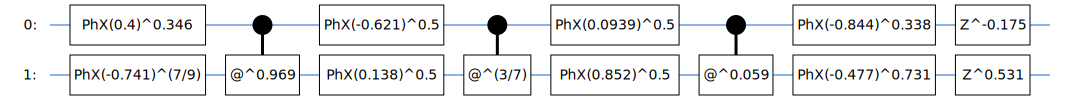

In [0]:
desired_matrix = cirq.testing.random_unitary(dim=4)

synthesized_operations = cirq.two_qubit_matrix_to_operations(
    cirq.LineQubit(0),
    cirq.LineQubit(1),
    desired_matrix,
    allow_partial_czs=True,
)
circuit = cirq.Circuit(synthesized_operations)

synthesized_matrix = cirq.unitary(circuit)

cirq.testing.assert_allclose_up_to_global_phase(
    desired_matrix,
    synthesized_matrix,
    atol=1e-4
)

print(desired_matrix.round(3))
print(synthesized_matrix.round(3))
SVGCircuit(circuit)

In [0]:
cirq.testing.assert_allclose_up_to_global_phase(
    desired_matrix,
    synthesized_matrix,
    atol=1e-4
)

## Decomposition of 1-qubit unitary matrix

[[-0.026+0.042j  0.644-0.763j]
 [ 0.755+0.654j  0.032+0.037j]]


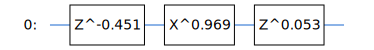

In [0]:
circuit = cirq.Circuit()
qubits=cirq.LineQubit.range(1)

desired_matrix = cirq.testing.random_unitary(dim=2)

synthesized_operations = cirq.single_qubit_matrix_to_gates(desired_matrix)
for i in synthesized_operations:
      circuit.append(i(qubits[0]))

print(desired_matrix.round(3))
#synthesized_operations
SVGCircuit(circuit)

In [0]:
cirq.single_qubit_matrix_to_gates(desired_matrix)

[(cirq.Z**-0.45089275338080265),
 (cirq.X**0.9687029939460321),
 (cirq.Z**0.05322848078649861)]

In [0]:
cirq.testing.assert_allclose_up_to_global_phase(
    desired_matrix,
    cirq.unitary(circuit),
    atol=1e-4
)

## Testing 1-Qubit Unitary Gate conversion

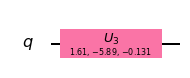

In [0]:
qc=QuantumCircuit(1)
alpha=np.random.rand(2,2)+1j*np.random.rand(2,2)
u,s,v=np.linalg.svd(alpha)

qc.unitary(Operator(u),[0])
qc=transpile(qc,basis_gates=['cx','u3'])  

qc.draw(output='mpl')

In [0]:
theta, phi, lambd = qc.data[0][0]._params
matrix=np.array([[np.cos(theta/2),-np.exp(1j*lambd)*np.sin(theta/2)],[np.exp(1j*phi)*np.sin(theta/2),np.exp(1j*(phi+lambd))*np.cos(theta/2)]])

print(matrix.round(3))
print(u.round(3))

cirq.testing.assert_allclose_up_to_global_phase(matrix, u, atol=1e-4)

[[ 0.691+0.j    -0.716+0.094j]
 [ 0.666+0.279j  0.667+0.182j]]
[[-0.678-0.138j  0.721+0.05j ]
 [-0.598-0.406j -0.618-0.311j]]


## Cirq Simulator

In [7]:
#Bell State
bell_circuit = cirq.Circuit()
q0, q1 = cirq.LineQubit.range(2)
bell_circuit.append(cirq.H(q0))
bell_circuit.append(cirq.CNOT(q0,q1))

# Initialize Simulator
s=cirq.Simulator()

print('Simulate the circuit:')
results=s.simulate(bell_circuit)
print(results)
print()

# For sampling, we need to add a measurement at the end
bell_circuit.append(cirq.measure(q0, q1, key='result'))

print('Sample the circuit:')
samples=s.run(bell_circuit, repetitions=1000)
# Print a histogram of results
print(samples.histogram(key='result'))

Simulate the circuit:
measurements: (no measurements)
output vector: 0.707|00⟩ + 0.707|11⟩

Sample the circuit:
Counter({0: 528, 3: 472})
